2018/5/13

test script to help fix issue with graphviz – error when trying to display, and not displaying correctly (boxes don't fit contents) when conda vsn installed.

---

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [2]:
PATH = "data/bulldozers/"

In [7]:
# df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,
#                      parse_dates=["saledate"])
# df_raw.SalePrice = np.log(df_raw.SalePrice)
# os.makedirs('tmp', exist_ok=True)
# df_raw.to_feather('tmp/df_raw.feather')

In [3]:
df_raw = pd.read_feather('tmp/df_raw.feather')
add_datepart(df_raw, 'saledate')
train_cats(df_raw)
df, y, nas = proc_df(df_raw, 'SalePrice')

In [4]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 12000 # same as Kaggle's test set size
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# X_train.shape, y_train.shape, X_valid.shape

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid), 
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [5]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [6]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5254209267350565, 0.5809499119884205, 0.3940282308089076, 0.3972664664069727]


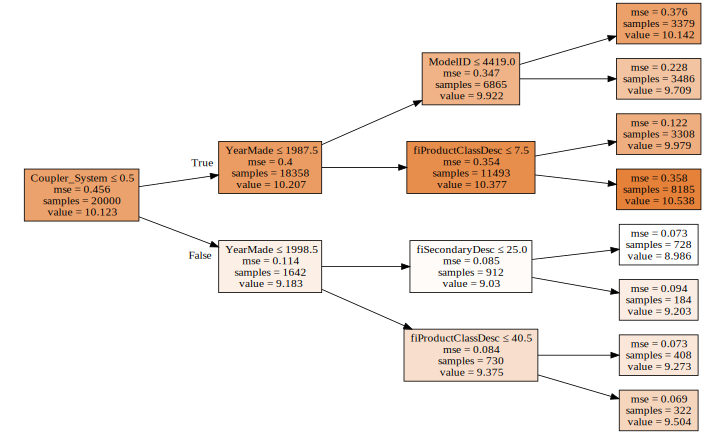

In [8]:
draw_tree(m.estimators_[0], df_trn, precision=3)

right. So what I needed to do to solve the problem on MacOS: `brew install graphviz` in terminal. This fixed the box sizing issue, but the first box is still misaligned (should be better centered vertically) and the arrows on the 2nd column could be pointed better. Oh well, I guess this is the limitation on MacOS for now.

---